In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from src.hops import runge_kutta

This is a short notebook testing the implementation of Runge-Kutta 4 on a simple differential equation

\begin{equation}
    \frac{d}{dt}y(t) = \sin(t)^2 \cdot y(t),
\end{equation}

which has an exact solution that can be easily determined analytically.

In [3]:
def exact_solution(ts):
    return np.exp((2*ts-np.sin(2*ts))/4)

In [4]:
N_exact = 1000
ts_exact = np.linspace(0, 5, N_exact)
exact = exact_solution(ts_exact)

In [5]:
def rk4_solution(N):
    ts = np.linspace(0, 5, 2*N)
    def f(t_index, y):
        return np.sin(ts[t_index])**2 * y
    y = 1
    dt = ts[2] - ts[0]
    ys = [y]
    for i in range(N-1):
        y = runge_kutta.integrate_RK4(y, 2*i, dt, f)
        ys.append(y)
    return ys

In [6]:
rk4_10 = rk4_solution(10)
rk4_100 = rk4_solution(100)
rk4_1000 = rk4_solution(1000)

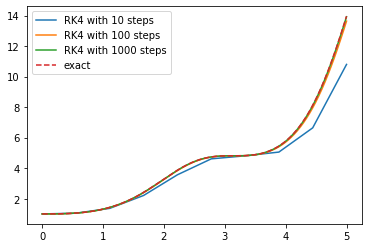

In [7]:
plt.plot(np.linspace(0, 5, 10), rk4_10, "-", label="RK4 with 10 steps")
plt.plot(np.linspace(0, 5, 100), rk4_100, "-", label="RK4 with 100 steps")
plt.plot(np.linspace(0, 5, 1000), rk4_1000, "-", label="RK4 with 1000 steps")
plt.plot(ts_exact, exact, "--", label="exact")
plt.legend()
plt.show()